# Machine Learning: Homework 4 - Jose Vazquez-Espinoza

Algorithm's implementation in: https://github.com/

In [1]:
import numpy as np
import math
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import random
from scipy.stats import multivariate_normal 
%matplotlib inline

#Implementation of Own Algorithm
from ML_Algorithms import metrics
from ML_Algorithms import utils
from ML_Algorithms import SupportVectorMachine as svm

## Part 1 (BISHOP):

5.5 ) Show that maximazing likelihood for a multiclass neural network model in which the network outputs have the interpretation $y_k(\mathbf{x}, \mathbf{w}) = p(t_k = 1 \mid x)$ is equivalent to the minimization of the cross-entropy error function 
$$ E(\mathbf{w})= -\sum_{n=1}^N \sum_{k=1}^K t_{kn} \ln y_k (\mathbf{x}_n, \mathbf{w})$$

<font color='blue'>

For $y_k (x,w)$ we have the conditional distribution (Multinomial) of the labels given the sample $x$ and the parameters $w$ of the neurons. 

$$p(t | w_1, ... , w_K, x) = \prod_{k=1}^K y_k(x, w)^{t_k}$$

For all the labels and data we have the following likelihood function

$$p(T | w_1, ... , w_K , x_1, ... , x_N) = \prod_{n=1}^N \prod_{k=1}^K y_{nk}(x_n, w)^{t_nk}$$

Maximazing the likelihood is equivalent to minimizing the log likelihood, taking the logarithm of the above expression we have 
$$
-\ln (p(T | ...)) = 
-\ln \big( \prod_{n=1}^N \prod_{k=1}^K y_{nk}(x_n, w_k)^{t_nk} \big)
= - \sum_{n=1}^N \ln \big( \prod_{k=1}^K y_{nk}(x_n, w_k)^{t_nk} \big)
= - \sum_{n=1}^N \sum_{k=1}^K \ln \big( y_{nk}(x_n, w_k)^{t_nk} \big)
= - \sum_{n=1}^N \sum_{k=1}^K t_{nk} \ln \big( y_{nk}(x_n, w_k) \big)
$$

</font>


5.10 ) Consider a Hessian matrix $\mathbf{H}$ with eigenvector equation

$$ \mathbf{H u}_i = \lambda_i \mathbf{u}_i$$

By setting the vector $\mathbf{v}$ in

$$\mathbf{v}^T \mathbf{Hv} = \sum_i c_i^2 \lambda_i$$

equal to each of the eigenvectors $\mathbf{u}_i$ in turn, show that $\mathbf{H}$ is positive definite if, and only if, all of its eigenvalues are positive.


<font color='blue'>

Assuming $H$ is possitive definite and ussing the first equation we have that

$$\lambda_i = \mathbf{u_i^T H u_i}  > 0 $$

using the fact that

$$\mathbf{v} = \sum_i c_i \mathbf{u}_i$$

we can see that

$$\mathbf{v}^T \mathbf{H v} = \big(\sum_i c_i \mathbf{u}_i \big)^T H \big(\sum_i c_i \mathbf{u}_i \big)
= \sum_i \lambda_i c_i^2 > 0$$

in order for this expression to always hold, it needs that the eigenvalues are greater than 0, and when this happens the Hessian is going to be possitive definite

</font>

9.4 )
Suppose we wish to use EM algorithm to maximize the posterior distribution over parameters $p(\theta|X)$ for a model containing latent variables, where $X$ is observed data set. Show that E step remains the same as in the maximum likelihood case, whereas in the M step the quantity to be maximized is given by $$Q(\theta,\theta^{old})+\ln p(\theta)$$ where $$Q(\theta,\theta^{old})$$ is defined by 

$$Q(\mathbf{\theta, \theta}^{old}) = \sum_{\mathbf{z}} p (\mathbf{Z} | \mathbf{X, \theta}^{old}) \ln p(\mathbf{X}, \mathbf{Z} | \mathbf{\theta})$$

<font color='blue'>

Normally we maximize the $p(X|\theta)$ but now we need to maximize $p(\theta|X)$, we need to use bayes theorem for this

$$p(\theta|X) = \frac{p(X|\theta) p(\theta)}{p(X)}$$

Maximizing this is equal to maximize only the numerator and for convinience we maximize the logarithm of this distribution

$$\max_\theta \ln p(\theta|X) = \max_\theta \big( \ln p(X|\theta)  + \ln  p(\theta) \big) $$

note that the first term is the log likelihood of the normal EM step algorithm for this we need to maximize $ Q(\theta, \theta^{old})$ but because we have a new term $\ln p(\theta)$ now we need to maximize the following equation in the M step

$$Q(\theta,\theta^{old})+\ln p(\theta)$$ 
</font>

9.11 )
In section 9.3.2 we obtained a relationship between $K$ means and EM for Gaussian Mixture by considering a mixture model in which all components have covariance $\epsilon I$. Show that in the limit $\epsilon \rightarrow 0$, maximize the expected complete data log likelihood for his model, given by

$$\mathop{\mathbb{E_z}} = \lbrack \ln p(\mathbf{X,Z | \mu, \Sigma, \pi}) \rbrack = \sum_{n=1}^N \sum_{k=1}^K \gamma(z_{nk}) \{ \ln \pi_k + \ln \mathscr{N}( \mathbf{x_n | \mu_k, \Sigma_k)}\} $$

is equivalent to minimizing the distortion measure $J$ for the K-means algorithm given by 

$$J = \sum_{n=1}^N \sum_{k=1}^K r_{nk} || \mathbf{x}_n - \mathbf{\mu}_k ||^2 $$

<font color='blue'>
In the text it is shown that $\delta(z_{nk}) \rightarrow r_{nk}$ when $\epsilon \rightarrow 0$. Now we know that our optimization problem will not depend on $\pi_k$ due the absence of latent variables. then our function to minimize will be 

$$E_z = \sum_{n=1}^N \sum_{k=1}^K r_{nk} \ln \mathscr{N}( \mathbf{x_n} | \mu_k, \epsilon I)\}$$

and minimizing this is equal to minimize

$$J = \sum_{n=1}^N \sum_{k=1}^K r_{nk} || \mathbf{x}_n - \mathbf{\mu}_k ||^2 $$
</font>

9.15 ) Show that if we maximize the expected complete-data log likelihood function 
(9.55) 

$$ \mathop{\mathbb{E_z}} = \lbrack \ln p(\mathbf{X,Z | \mu, \pi}) \rbrack = \sum_{n=1}^N \sum_{k=1}^K \gamma(z_{nk}) \big\{ \ln \pi_k + \sum_{i=1}^D \lbrack x_{ni} \ln \mu_{ki} + (1 - x_{ni}) \ln (1 - \mu_ {ki} ) \rbrack   \big\} $$

for a mixture of Bernoulli distribution with respect to $\mu_k$, we obtain the M step equation

$$\pi_k = \frac{N_k}{N}$$

<font color='blue'>



</font>

## Part 2 (HAYKIN):

4.4 ) The momentum constant ()' is normally assigned a positive value in the range $0 \leq \alpha < 1$.
Investigate the difference that would be made in the behavior of 


$$\delta w_{ji} (n) = - \eta \sum_{t=0}^n \alpha ^{n-t} \frac{\partial \mathscr{E}(t)}{\partial w_{ji}(t)}$$


with respect to time t if $\alpha$ was assigned a negative value in the range $-1 \leq \alpha < 0$.

4.6 ) In Section 4.7 we presented qualitative arguments for the property of a multilayer per-ceptron classifier (using a logistic function for nonlinearity) that its outputs provide estimates of the a posteriori class probabilities. This property assumes that the size of the training set is large enough, and that the back-propagation algorithm used to train the network does not get stuck at a local minimum. Fill in the mathematical details of this property.

6.6 ) The inner-product kernel kernel $K(X_{i}, K_{j})$ is evaluated over a training sample $\mathscr{T}$ of size N, yield-ing the N-by-N matrix: 
$$K = \left \{ K_{ij} \right \}_{i,j=1}^{N}$$

where $K_{ij} = K(X_{i},X_{j})$. The matrix K is positive in that all of its elements have positive values. Using the similarity transformation: 

$$K = Q \Delta Q^{T}$$

where $\Delta$ is a diagonal matrix of eigenvalues and Q is a matrix made up of the corresponding eigenvectors, formulate an expression for the inner-product kernel $K(X_{i}, X_{j})$ in terms of the eigenvalues and eigenvectors of matrix K. What conclusions can you draw from this representation?

6.13 ) Compare the virtues and limitations of support vector machines with those of radial-basis function (RBF) networks with respect to the following task: 

* (1) Pattern classification 
* (2) Nonlinear regression . 

Do the same for support vector machines versus multilayer perceptron trained using the back propagation algorithm


6.15 ) The computer experiment described in section 6.6 was for the classification of two overlapping Gaussian Distributions. The following "regularization" parameter was used in that experiment: C = 0.1 The common width of the radial-basis functions used for con-structing the inner-product kernels was $\sigma ^{2} = 4$. Repeat the computer experiment described in that section for the following two values of the regularization parameter:

* C = 0.05
* C = 0.2

## Part 3:

Implement the SVM using cv xopt for the quadratic optimization under linear constrains using the

* (a) Using the voice data set, please perform the K - Cross Validation and report using ROC curves under the following kernels. 

    * 1. Polynomial Kernel $K(\mathbf{x}_i, \mathbf{x}_j) = (\mathbf{x}_i^T \mathbf{x}_i + 1)^P $ with p defined before hand.
    * 2. Radial Kernel $K(\mathbf{x}_i, \mathbf{x}_j) = \exp \big\{ - \frac{1}{2 \sigma^2} || \mathbf{x}_i - \mathbf{x}_j ||^2\big\}$ with $\sigma^2$ defined before hand.

In [2]:
data = pd.read_csv("voice.csv")

In [3]:
data.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [12]:
np.sum(np.sum(data.isnull()))

0L

It does not have missing values and everything is type float, so we can proceed to create the labels vector.

In [5]:
# Create new label column
data["intlabel"] = 0
# Assign labels
data.loc[data["label"] == "male", "intlabel"] = 1
data.loc[data["label"] == "female", "intlabel"] = -1
Y = data["intlabel"].values
X = data.drop(["label", "intlabel"], axis = 1).values

Normalizing the data to the unit norm

In [6]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
normalizer.fit(X)
Xnorm = normalizer.fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xnorm, Y, test_size=0.2, random_state=1)

Polynomial kernel

In [9]:
import ML_Algorithms.Kernel as kern
C_list = [0.0001, 0.001, 0.01, 0.1, 1]
kernel = kern.Kernel._polykernel(3, 0)
train_accs  = []
test_accs = []
predictors = []
for i, C in enumerate(C_list):
    clf = svm.SVMTrainer(kernel, C)
    predictor = clf.train(X_train, y_train.astype(float))
    predictors.append(predictor)
    predicted_train = predictor.predict_all(X_train)
    predicted_test = predictor.predict_all(X_test)
    train_accs.append(metrics.accuracy(y_train, predicted_train))
    test_accs.append(metrics.accuracy(y_test, predicted_test))

0
     pcost       dcost       gap    pres   dres
 0: -1.0466e+02 -5.0881e+01  2e+04  1e+02  1e-10
 1: -9.1995e+00 -4.7803e+01  6e+02  4e+00  2e-10
 2: -3.7548e+00 -3.8706e+01  1e+02  7e-01  2e-11
 3: -2.3003e+00 -2.4123e+01  5e+01  2e-01  8e-12
 4: -1.3989e+00 -1.1966e+01  2e+01  8e-02  3e-12
 5: -1.0184e+00 -6.9308e+00  1e+01  4e-02  2e-12
 6: -7.5178e-01 -3.8629e+00  5e+00  2e-02  7e-13
 7: -6.6823e-01 -2.5418e+00  3e+00  8e-03  5e-13
 8: -6.0767e-01 -1.8407e+00  2e+00  5e-03  3e-13
 9: -5.7447e-01 -1.3910e+00  1e+00  2e-03  2e-13
10: -5.5160e-01 -1.0973e+00  8e-01  1e-03  2e-13
11: -5.6839e-01 -8.1546e-01  3e-01  5e-04  2e-13
12: -5.8365e-01 -6.9798e-01  1e-01  2e-04  2e-13
13: -5.9848e-01 -6.3102e-01  4e-02  4e-05  2e-13
14: -6.0341e-01 -6.1114e-01  8e-03  1e-16  2e-13
15: -6.0646e-01 -6.0745e-01  1e-03  1e-16  2e-13
16: -6.0690e-01 -6.0693e-01  2e-05  1e-16  2e-13
17: -6.0692e-01 -6.0692e-01  5e-07  1e-16  2e-13
Optimal solution found.
1
     pcost       dcost       gap    pres  

Gaussian/Radial Kernel

In [9]:
C2 = 10
kernel2 = kern.Kernel.gaussian(1)
clf2 = svm.SVMTrainer(kernel2, C2)
predictor2 = clf2.train(X_train, y_train.astype(float))

     pcost       dcost       gap    pres   dres
 0:  4.7147e+03 -8.5005e+04  2e+05  3e-01  1e-14
 1:  3.4001e+03 -1.2705e+04  2e+04  2e-02  7e-15
 2:  8.0420e+02 -3.5227e+03  5e+03  3e-03  1e-14
 3:  8.9621e+01 -1.4912e+03  2e+03  7e-04  5e-15
 4: -1.5781e+02 -4.2258e+02  3e+02  2e-05  4e-15
 5: -1.9260e+02 -2.6717e+02  7e+01  5e-06  2e-15
 6: -2.0303e+02 -2.2605e+02  2e+01  1e-06  1e-15
 7: -2.0676e+02 -2.1375e+02  7e+00  2e-07  1e-15
 8: -2.0811e+02 -2.1000e+02  2e+00  3e-08  1e-15
 9: -2.0856e+02 -2.0877e+02  2e-01  1e-09  1e-15
10: -2.0862e+02 -2.0863e+02  7e-03  6e-12  1e-15
11: -2.0863e+02 -2.0863e+02  2e-04  2e-13  1e-15
12: -2.0863e+02 -2.0863e+02  5e-06  2e-14  1e-15
Optimal solution found.


ROC curves only evaluated for Polynomial kernel, Conclusion: the generation of ROC curves is not recommended for support vector machines because we need to change the bias term in each iteration to change the decission boundary, but then we need to reevaluate every sample iterating through the support vectors. The evaluation with the radial kernel was too computationally expensive. Therefore, it was decided to skip this.

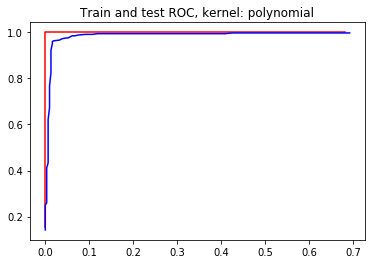

In [11]:
predictor = predictors[4]
rocs_train = predictor.roc(X_train, y_train)
rocs_test = predictor.roc(X_test, y_test)

plt.plot(rocs_train[:,0], rocs_train[:,1], color = 'r')
plt.plot(rocs_test[:,0], rocs_test[:,1], color = 'b')
plt.title("Train and test ROC, kernel: polynomial")

## Part 4:

Implement the multi-layer perceptron using sstochastic gradient descent and batch using the cross-entropy cost function and the ReLu activation function

* (a) Using the voice data set, please perfeorm the K-Cross Validation to compare both algorithms. Report using ROC curves annd times of convergence in number of steps